# Required Lab -- week of March 19th -- 23rd

Make an animated plot in matplotlib that recreates an analogue clock. 

Make the minute and hour markers in black.  Put numbers (text field) at the hour markers.  Make the hour hand short and fat, the minute hand long and thin, both in black.  Make the second hand in red. 

Set the time on your clock to local time -- use the **time** library. 

Make both a (normal) 12-hour version of your clock, and a 24-hour version. 

In [71]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

%matplotlib nbagg

In [15]:
a=0.1
b=10

In [72]:
time?


In [84]:
time.localtime()

time.struct_time(tm_year=2018, tm_mon=3, tm_mday=23, tm_hour=22, tm_min=31, tm_sec=11, tm_wday=4, tm_yday=82, tm_isdst=0)

In [108]:
figure?




<IPython.core.display.Javascript object>


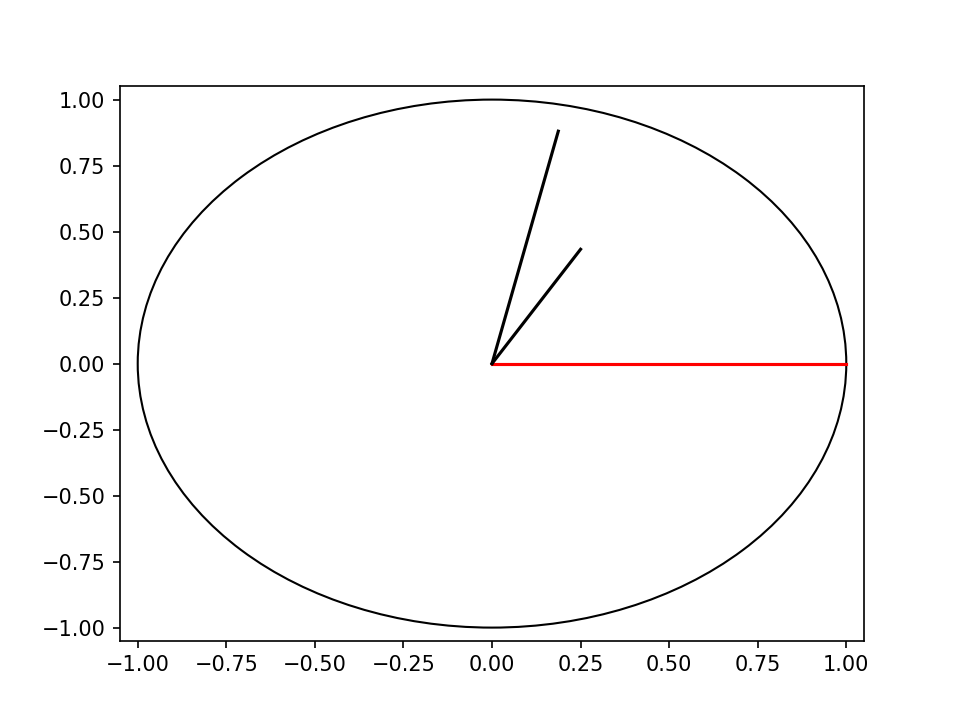

In [110]:
## let's now do an animated plot, to "see" the pendulum in action
plt.close()
fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, color='black', fill=False)

ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)



#print (TH[-1])

second_hand, = plt.plot([0, 0], [0, 1], 'r')
minute_hand, = plt.plot([0,0], [0,1], 'black')
hour_hand, = plt.plot([0,0], [0,.5], 'black')

dt = 0.002

def init():
    second_hand.set_xdata( [0,0] )
    second_hand.set_ydata( [0,1] )
    
    minute_hand.set_xdata([0,0])
    minute_hand.set_ydata([0,1])
    
    hour_hand.set_xdata([0,0])
    hour_hand.set_ydata([0,1])
    
    return [second_hand, minute_hand, hour_hand]

def animate(i):
    now = time.localtime()
    ## asking the ODE code to do just one step
    theta_s = np.pi/2 + now.tm_sec*2*np.pi/60
    theta_m = np.pi/2 + now.tm_min*2*np.pi/60 
    theta_h = np.pi/2 + now.tm_hour*2*np.pi/12
    
    
    second_hand.set_xdata( [0.0, np.sin(theta_s)])
    second_hand.set_ydata( [0.0, np.cos(theta_s)])
    
    minute_hand.set_xdata([0, .90*np.sin(theta_m)])
    minute_hand.set_ydata([0, .90*np.cos(theta_m)])
    hour_hand.set_xdata([0, 0.5*np.sin(theta_h)])
    hour_hand.set_ydata([0, 0.5*np.cos(theta_h)])
    
    return [second_hand, minute_hand, hour_hand]
    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=200, blit=True )



plt.show()

In [96]:
def animate(i):
    now = time.localtime()
    ## asking the ODE code to do just one step
    theta_s = np.pi/2 + now.tm_sec*2*np.pi/60
    theta_m = np.pi/2 + now.tm_minute*2*np.pi/60
    theta_h = np.pi/2 + now.tm_hour*2*np.pi/12
    
    
    second_hand.set_xdata( [0.0, np.sin(theta_s)])
    second_hand.set_ydata( [0.0, np.cos(theta_s)])
    
    minute_hand.set_xdata([0, np.sin(1/60*theta)])
    minute_hand.set_ydata([0, np.cos(1/60*theta)])
    
    hour_hand.set_xdata([0, 0.5*np.sin(1/3600*theta)])
    hour_hand.set_ydata([0, 0.5*np.cos(1/3600*theta)])
    
    return [second_hand, minute_hand, hour_hand]


animate(3)

AttributeError: 'time.struct_time' object has no attribute 'tm_minute'